In [1]:
from bs4 import BeautifulSoup
import requests
import itertools
import re
result = []
for j in range(8):
    url = "https://icook.tw/categories/60?page={}".format(j)
    rescook = requests.get(url)
    soup = BeautifulSoup(rescook.text, "lxml")
    
    for i in range(12):
        text = soup.select('.material')[i].text[3:]
        text = text.split('、')
        text_unpr = []
        for q in text:
            text_unpr.append(re.sub(r'\([^)]*\)|【[^)]*】|［[^)]*］|（[^)]*）| [^)]*','',q))
        result.extend(list(itertools.combinations(text_unpr, 2)))
print('Number of total pairs:', len(result))
print('Some examples:', result[:6])

Number of total pairs: 2854
Some examples: [('蛋', '動物性鮮奶油'), ('蛋', '鹽巴'), ('蛋', '胡椒粉'), ('蛋', '牛番茄'), ('蛋', '洋蔥'), ('蛋', '紅蘿蔔')]


/usr/local/lib/python3.4/dist-packages/matplotlib-1.5.2rc2_1932.g75a35ef-py3.4-linux-x86_64.egg/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


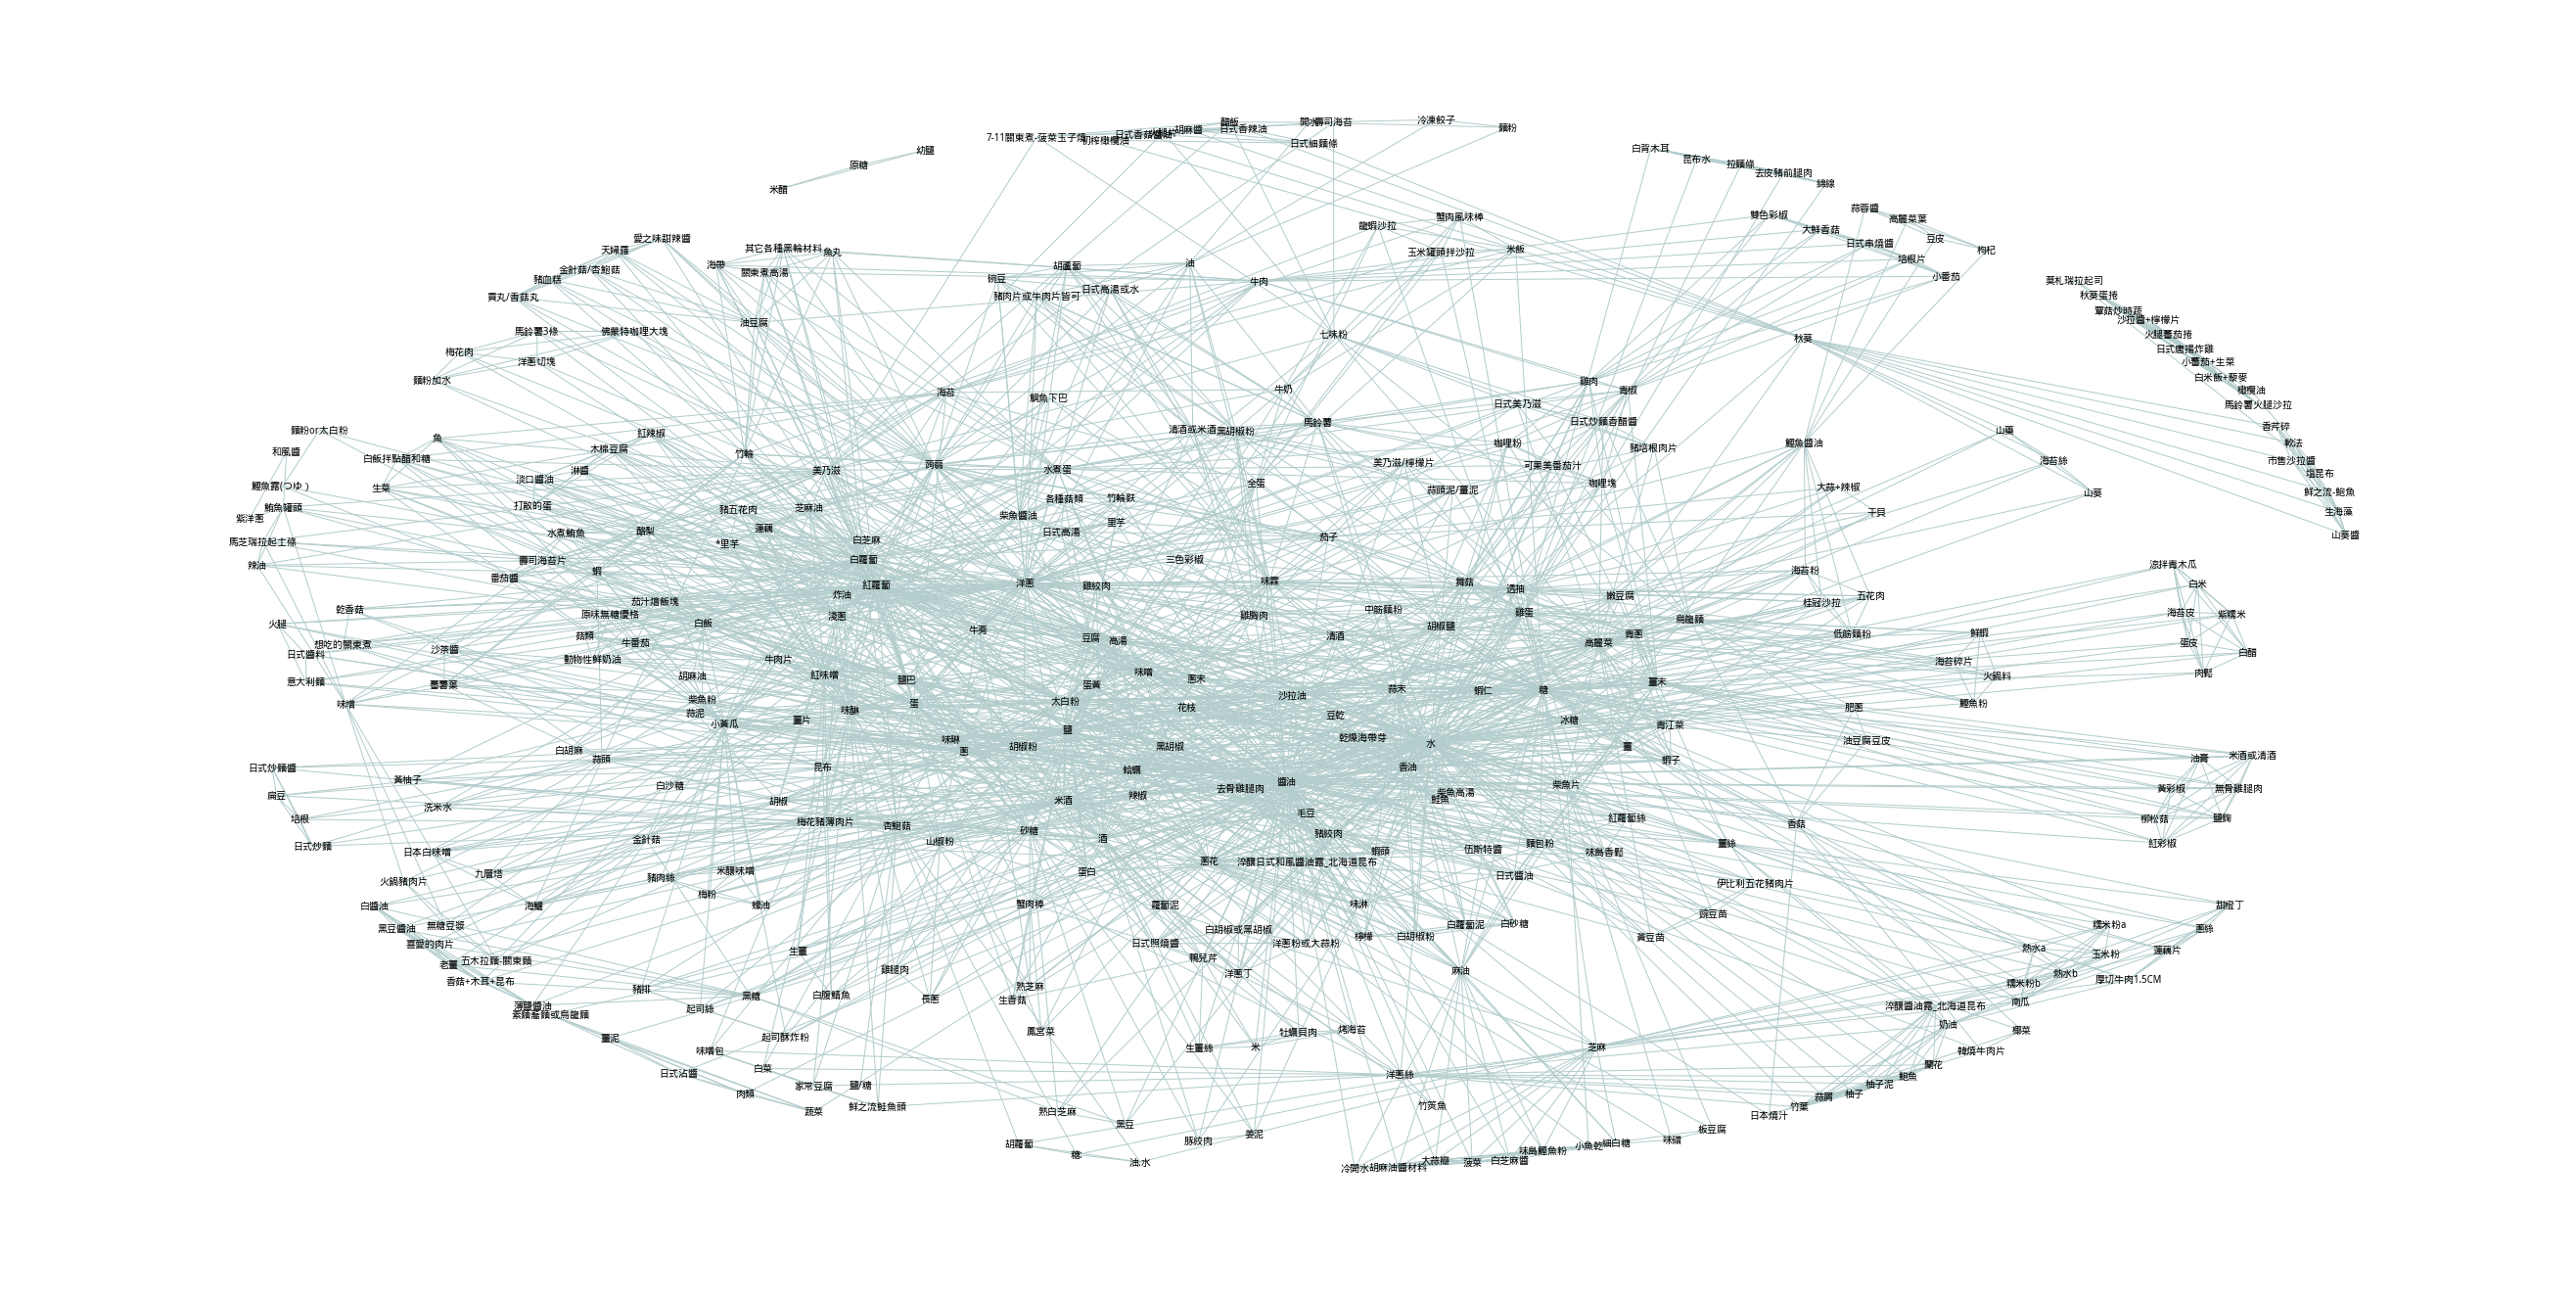

In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.font_manager as fm
%matplotlib inline

WQY = fm.FontProperties(fname = "/usr/share/fonts/truetype/wqy/wqy-microhei.ttc")
nx.set_fontproperties(WQY)

default_weight = 0.2
G = nx.Graph()

BLUE = "#99CCFF"
GRAY = "#b3cccc"

for nodes in result:
    n0 = nodes[0]
    n1 = nodes[1]
    if G.has_edge(n0,n1):   
        G[n0][n1]['weight'] += default_weight
    else:
        G.add_edge(n0,n1, weight = default_weight)


nx.draw(G, node_color = BLUE, with_labels = True,edge_color = GRAY, node_size = 1)
fig = plt.gcf()
fig.set_size_inches(36, 18)
fig.savefig('japan_recipe.png', dpi=100)

In [3]:
import operator
from collections import Counter

sorted_dg = sorted(nx.degree(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree:',sorted_dg[:15])

print()

sorted_close = sorted(nx.closeness_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Closeness centrality:',sorted_close[:15])

print()

sorted_degree = sorted(nx.degree_centrality(G).items(), key = operator.itemgetter(1), reverse = True)
print('Degree centrality:',sorted_degree[:15])


Degree: [('醬油', 133), ('水', 110), ('洋蔥', 82), ('紅蘿蔔', 77), ('鹽', 67), ('米酒', 62), ('白蘿蔔', 61), ('糖', 60), ('太白粉', 52), ('高麗菜', 43), ('酒', 43), ('蒟蒻', 42), ('蛋', 40), ('蔥花', 40), ('味醂', 38)]

Closeness centrality: [('醬油', 0.571630967246182), ('水', 0.5453058569124762), ('洋蔥', 0.5245980395613695), ('紅蘿蔔', 0.5054054283579047), ('鹽', 0.5054054283579047), ('太白粉', 0.4868516314284663), ('米酒', 0.4840087021938475), ('糖', 0.47431467954618817), ('蛋', 0.4722876937361617), ('胡椒粉', 0.4709459673335022), ('味噌', 0.4702779588691993), ('白蘿蔔', 0.4663093684989951), ('鹽巴', 0.46500134782999375), ('蒜末', 0.464350085438075), ('高麗菜', 0.46305301816031497)]

Degree centrality: [('醬油', 0.37047353760445684), ('水', 0.3064066852367688), ('洋蔥', 0.22841225626740946), ('紅蘿蔔', 0.21448467966573817), ('鹽', 0.18662952646239556), ('米酒', 0.17270194986072424), ('白蘿蔔', 0.16991643454038996), ('糖', 0.1671309192200557), ('太白粉', 0.14484679665738162), ('高麗菜', 0.11977715877437325), ('酒', 0.11977715877437325), ('蒟蒻', 0.116991643454039),

In [4]:
nd = G.number_of_nodes()
possible_edges = nd*(nd-1)/2

print('Total possible edges:',possible_edges)
print('Total edges in the graph:',G.number_of_edges())

density = round(nx.density(G),4)
print('Density:',density)
print()
print(nx.info(G))

Total possible edges: 64620.0
Total edges in the graph: 2248
Density: 0.0348

Name: 
Type: Graph
Number of nodes: 360
Number of edges: 2248
Average degree:  12.4889


In [5]:
occurence = [(g[0], len(list(g[1]))) for g in itertools.groupby(result)]
num = 0
for k in occurence:
    num = num + k[1]
print(num)
sorted(occurence, key = lambda x : x[1], reverse = True)[:10]

2854


[(('蛋', '動物性鮮奶油'), 1),
 (('蛋', '鹽巴'), 1),
 (('蛋', '胡椒粉'), 1),
 (('蛋', '牛番茄'), 1),
 (('蛋', '洋蔥'), 1),
 (('蛋', '紅蘿蔔'), 1),
 (('蛋', '白蘿蔔'), 1),
 (('蛋', '菇類'), 1),
 (('蛋', '牛肉片'), 1),
 (('蛋', '原味無糖優格'), 1)]

In [6]:
max_degree_item = max(nx.degree(G).items(),key=operator.itemgetter(1))
print(max_degree_item[1])

133


In [7]:
total = 0
for i,v in nx.degree(G).items():
    subv = max_degree_item[1] - v
    total += subv

dn = (nd-1)*(nd-2)
centr = total/dn
print('Group centrality:',round(centr,4))

Group centrality: 0.3376
